IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

MOUNTING DRIVE

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FUNCTION DEFINITIONS

In [4]:
def cost_function(X,y,w):
  hypothesis = np.dot(X,w.T)
  J = (1/(2*len(y))) * np.sum((hypothesis - y)**2)
  return J

In [5]:
def batch_gradient_descent(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [6]:
def mini_batch_gradient_descent(X,y,w,alpha,iters,batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w,cost_history

In [7]:
def stochastic_gradient_descent(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w,cost_history

DATA PRE-PROCESSING

In [13]:
from random import Random
data = pd.read_excel("/content/gdrive/MyDrive/NNFL_ASSIGNMENT_1/data_q1.xlsx")
Random(14).shuffle(data.values)
Random(14).shuffle(data.values)
Random(10).shuffle(data.values)
X = data.drop("Output",axis=1)
y = data["Output"]

In [14]:
mean = X.mean()
std = np.std(X,axis=0)
m = len(X)
X_norm = (X-mean)/std
X_norm = np.c_[np.ones((m, 1)), X_norm]

In [15]:
w = np.zeros(X_norm.shape[1])

BATCH GRADIENT DESCENT

In [16]:
alpha = 0.001
iters = 4000
batch_w, J_his_batch = batch_gradient_descent(X_norm,y,w,alpha,iters)

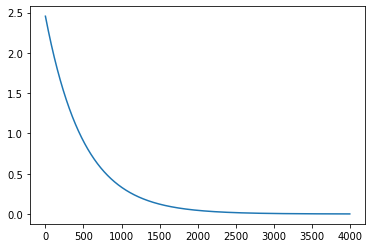

In [17]:
plt.plot(range(iters),J_his_batch)
plt.show()

MINI-BATCH GRADIENT DESCENT

In [18]:
alpha = 0.01
iters = 400
batch_size = 10
mini_batch_w, J_his_mini_batch = mini_batch_gradient_descent(X_norm,y,w,alpha,iters,batch_size)

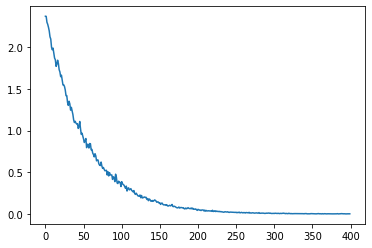

In [19]:
plt.plot(range(iters),J_his_mini_batch)
plt.show()

STOCHASTIC GRADIENT DESCENT

In [20]:
alpha = 0.005
iters = 1000
stochastic_w, J_his_stochastic = stochastic_gradient_descent(X_norm,y,w,alpha,iters)

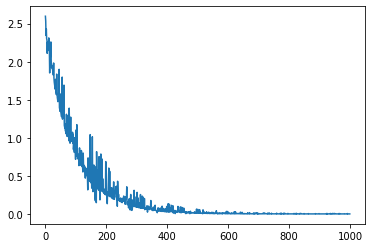

In [21]:
plt.plot(range(iters),J_his_stochastic)
plt.show()

CONTOUR PLOT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


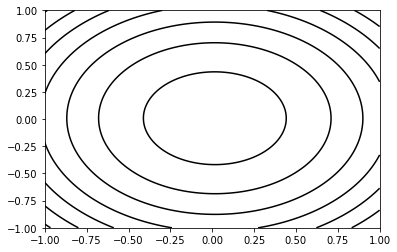

In [22]:
w1 = np.linspace(-1, 1, 500)
w2 = np.linspace(-1, 1, 400)

w1, w2 = np.meshgrid(w2, w2)
w = np.array([0,w1,w2])
Z = cost_function(X_norm,y,w)
plt.contour(w1, w2, Z, colors='black');

SURFACE PLOT

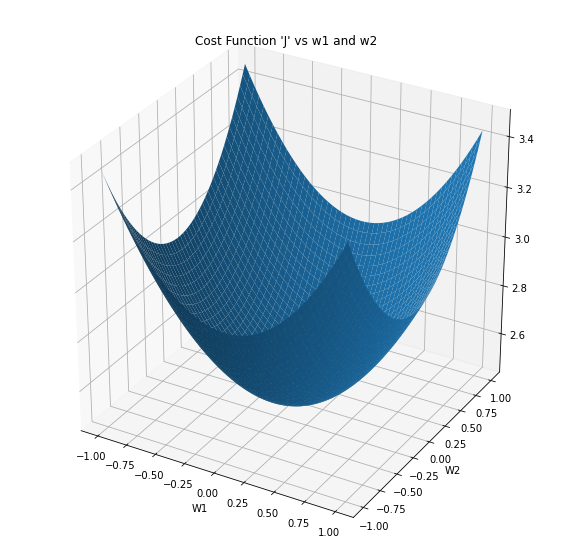

In [23]:
fig = plt.figure(figsize = [10,10])
axes = fig.gca(projection = '3d')

axes.plot_surface(w1,w2,Z)
axes.set_title("Cost Function 'J' vs w1 and w2")
axes.set_xlabel('W1')
axes.set_ylabel('W2')
plt.show()